# Полуесов Андрей

In [ ]:
import re
import time
import datetime
import pandas as pd
import warnings
from tqdm import tqdm
import random
from bs4 import BeautifulSoup
from dataclasses import dataclass
import requests
warnings.filterwarnings("ignore", category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Парcинг

## Часть 1. Парсинг (10 баллов)

Мы предлагаем вам распарсить часть данных litres.ru — а именно часть про книги, имеющие отношение к программированию.

Они находятся в этом каталоге: https://www.litres.ru/genre/programmirovanie-5272/

Вам нужно собрать датасет о книгах с первых 40-ти страниц каталога (около 960 книг.)
*Подсказка.* Можете начать с исследования html кода этой страницы.

Вам необходимо собрать датасет, содержащий следующие данные:
* name: название книги
* author: автор
* link: ссылка на книгу
* rating: рейтинг по 5-балльной шкале
* rating_count: количество оценок
* review_count: количество отзывов
* pages_count: объем (число страниц)
* price: цена
* text_reviews: тексты отзывов: список строк
* age: возрастное ограничение
* year: год написания

В дальнейшем вам нужно будет анализировать полученный у вас датасет.

Если у вас не получилось спарсить датасет, воспользуйтесь для последующих пунктов готовым датасетом: https://disk.yandex.ru/d/2UZet2-qxRxF6Q

 Так вы сможете получить баллы за вторую часть.

(Датасет неидеален, с ним придется поработать!)

**Парсите "вежливо": используйте time.sleep() не меньше 1-2 секунд между запросами к сайту!**

In [484]:
class parser_books:

    def __init__(self):
        self.url = 'https://www.litres.ru/genre/programmirovanie-5272/'
        self.base_url = 'https://www.litres.ru'
        
        # изначально не даем возмодность скраппинга
        self.open = False
    
    
    def get_url(self, page=1) -> str:
        """
        Перезаписывает ссылку на страницу
        """
        self.url = 'https://www.litres.ru/genre/programmirovanie-5272/'\
        + '?page={}'.format(page)
    
    def get_books_page(self):
        """
        Создает атрибут - html code страницы с книгами
        """
        
        try:
            response = requests.get(self.url)
        except Exception as exept:
            print('Ошибка при получении статуса', exept)
            # выход из функции
            return 

        if response.status_code != 200:
            print(response)
            # выход из функции
            return 

        tree = BeautifulSoup(response.content, 'html.parser')

        try:
            self.books_on_page=tree.find_all('div', {'class': 'ArtDefault_wrapper__VmWpW ArtDefault_wrapper__adaptive__VW5z0'})
        except Exception as exept:
            print('Ошибка при получении html_code страницы', exept)
            # выход из функции
            return 

        # даем возмодность скраппинга
        self.open=True


    def scrapping(self):
        """
            получает значения со странички 
        """
        if not self.open:
            print('Сначала нужно получить страницу с книгами')
            return []

        spisok=[]
        for book_op in tqdm(self.books_on_page):
            # останавливаемся на рандомное значение от 1 до 5
                
            try:
                
                time.sleep(random.randint(0,1))
    
                name_of_book = book_op.p.text
                name_of_author = book_op.find('a', {'data-testid': 'art__authorName'}).text
                link = self.base_url+book_op.a.get('href')
                rating = book_op.find('div',{'class':'ArtRating_rating__ntve8'}).text
                if rating == '0':
                    rating_count = 0
                else:
                    rating_count = book_op.find('div',{'class':'ArtRating_votes__MIJS1'}).text
                price = book_op.find('strong',{'class':'ArtPriceFooter_ArtPriceFooterPrices__final__7AMjB'}).text
                
                # дальше переходим на ссылку книги, которую спарсили ранее
                response = requests.get(link)
                
                # проверяем все ли ок
                if response.status_code == 200:
                    tree = BeautifulSoup(response.content, 'html.parser')
                
                    # тупо, чтобы полегче было считывтаь код
                    book_character = tree.find_all('div', {'class': 'CharacteristicsBlock_characteristic__4pi7v'})
    
                    # сначала выставляем неизвестные значения
                    age= None
                    year = None
                    pages_count = None
                    
                    # итерируемся по характеристикам
                    for row in book_character:
                        expression = row.span.text
                        if re.search(r'[Вв]озраст', expression):
                            #добаялем age
                            age = row.find_all('span')[-1].text
                    
                        if re.search(r'[Нн]аписан', expression):
                            #добаялем year
                            year = row.find_all('span')[-1].text
                    
                        if re.search(r'[Оо]бъем', expression):
                            #добаялем объем
                            pages_count = row.find_all('span')[-1].text
    
                    
                
                    try:
                        review_count = tree.find_all('span', {'class': 'CommentSystem_commentsCount__woGh3'})[0].text
                    except:
                        review_count = 0
                
                    # достаем первые отзывы
                    # чтобы другие достать нужен selenium, я через дургую библиотеку начал писать - не успею
                    
                    text_reviews = []
                    class_of_review = tree.find_all('article',{'class':'Comment_comment___A7LB'})
                    try:
                        for review in class_of_review:
                            text_reviews.append(review.p.text)
                    except:
                        ...
    
                    spisok.append([name_of_book, name_of_author, link, rating, 
                         rating_count, price, age, year, pages_count, review_count, text_reviews])
                else:
                    print(response.status_code)
                    return spisok
            except Exception as exept:
                print('Ошибка при скрапинге', exept)
                # выход из функции 
        return spisok 

In [ ]:
* name: название книги
* author: автор
* link: ссылка на книгу
* rating: рейтинг по 5-балльной шкале
* rating_count: количество оценок
* review_count: количество отзывов
* pages_count: объем (число страниц)
* price: цена
* text_reviews: тексты отзывов: список строк
* age: возрастное ограничение
* year: год написания

In [485]:
# слздаем датафрейм пустой
columns_of_df =['name_of_book', 'name_of_author', 'link', 'rating', 
             'rating_count', 'price', 'age', 'year', 'pages_count', 'review_count', 'text_reviews']
df = pd.DataFrame(columns =columns_of_df)

books = parser_books()

In [486]:
for page in tqdm(range(1,41)):
    books.get_url(page)
    books.get_books_page()
    spisok = books.scrapping()
    # создаем дф нашего нвого списка
    df2 = pd.DataFrame(spisok, columns = columns_of_df)

    df = pd.concat([df,df2], ignore_index=True)

  8%|███▋                                        | 2/24 [00:22<04:50, 13.23s/it]

Ошибка при скрапинге ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))



 12%|█████▌                                      | 3/24 [00:23<02:40,  7.65s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



  8%|███▋                                        | 2/24 [00:03<00:40,  1.83s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 17%|███████▎                                    | 4/24 [00:04<00:20,  1.00s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 25%|███████████                                 | 6/24 [00:07<00:18,  1.04s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 42%|█████████████████▉                         | 10/24 [00:14<00:22,  1.60s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 58%|█████████████████████████                  | 14/24 [00:30<00:26,  2.63s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 71%|██████████████████████████████▍            | 17/24 [00:37<00:15,  2.24s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'
Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 83%|███████████████████████████████████▊       | 20/24 [00:41<00:06,  1.73s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 48%|████████████████████▍                      | 19/40 [19:24<20:06, 57.43s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'
Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 12%|█████▌                                      | 3/24 [00:04<00:26,  1.27s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 33%|██████████████▋                             | 8/24 [00:16<00:33,  2.12s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 96%|█████████████████████████████████████████▏ | 23/24 [00:48<00:01,  1.56s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



  8%|███▋                                        | 2/24 [00:05<00:54,  2.49s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 25%|███████████                                 | 6/24 [00:15<00:46,  2.57s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 38%|████████████████▌                           | 9/24 [00:20<00:26,  1.80s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 33%|██████████████▋                             | 8/24 [00:17<00:39,  2.44s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



  0%|                                                    | 0/24 [00:00<?, ?it/s]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 12%|█████▌                                      | 3/24 [00:03<00:21,  1.01s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 29%|████████████▊                               | 7/24 [00:10<00:28,  1.69s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 38%|████████████████▌                           | 9/24 [00:14<00:27,  1.82s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 33%|██████████████▋                             | 8/24 [00:14<00:24,  1.51s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



  8%|███▋                                        | 2/24 [00:05<01:02,  2.84s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 96%|█████████████████████████████████████████▏ | 23/24 [00:42<00:01,  1.66s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



  0%|                                                    | 0/24 [00:00<?, ?it/s]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 67%|████████████████████████████▋              | 16/24 [00:41<00:23,  2.88s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 75%|████████████████████████████████▎          | 18/24 [00:42<00:10,  1.78s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'
Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 88%|█████████████████████████████████████▋     | 21/24 [00:47<00:05,  1.80s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 42%|█████████████████▉                         | 10/24 [00:22<00:34,  2.45s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 58%|█████████████████████████                  | 14/24 [00:28<00:17,  1.79s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



 83%|███████████████████████████████████▊       | 20/24 [01:04<00:07,  1.94s/it]

Ошибка при скрапинге 'NoneType' object has no attribute 'text'



100%|███████████████████████████████████████████| 40/40 [39:27<00:00, 59.19s/it]


In [493]:
df

,name_of_book,name_of_author,link,rating,rating_count,price,age,year,pages_count,review_count,text_reviews
0,Изучаем DDD – предметно-ориентированное проект...,Влад Хононов,https://www.litres.ru/book/vlad-hononov/izucha...,0,0,549 ₽,0+,2022,319 стр.,1,"[Эта книга из той лиги, в которой я пока не со..."
1,Высоконагруженные приложения. Программирование...,Мартин Клеппман,https://www.litres.ru/book/martin-kleppman-173...,"4,0",51,799 ₽,16+,2017,640 стр.,11,"[Не могу что-либо про перевод сказать, читал д..."
2,System Design. Подготовка к сложному интервью,Алекс Сюй,https://www.litres.ru/book/aleks-suy/system-de...,"3,6",17,699 ₽,16+,2020,304 стр.,9,[Добротная книга по разработке архитектуры при...
3,Начинаем программировать на Python,Тони Гэддис,https://www.litres.ru/book/toni-geddis-3249116...,"4,9",16,599 ₽,12+,2021,875 стр.,6,[Шикарная книга! Начал изучать Python самостоя...
4,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,"4,9",439,690 ₽,12+,2023,102 стр. 4 иллюстрации,37,[Книга отличная. Давно хотела понять как все р...
...,...,...,...,...,...,...,...,...,...,...,...
921,SQL и реляционная теория. Как грамотно писать ...,К. Дж. Дейт,https://www.litres.ru/book/k-dzh-deyt/sql-i-re...,"3,6",14,390 ₽,0+,None,472 стр.,2,[По сути автор рассказывает о логике и алгебре...
922,Разработка Linux-приложений,Денис Колисниченко,https://www.litres.ru/book/denis-kolisnichenko...,"4,7",10,255 ₽,0+,2011,426 стр.,3,"[Отличная книга, подходит для новичков! Затрон..."
923,Справочник системного администратора по програ...,И. В. Коробко,https://www.litres.ru/book/ivan-korobko/spravo...,"4,3",11,239 ₽,0+,2009,555 стр.,1,"[Мне, как начинающему системному администратор..."
924,Математика на Python. Часть I. Элементы линейн...,И. А. Александрова,https://www.litres.ru/book/anna-sergeevna-hrip...,"3,8",33,200 ₽,0+,2018,77 стр.,4,"[Замечательная книга, которую ждали многие люб..."


In [494]:
# сохраним, а то наебнется, кка обычно
df.to_csv('books.csv', index=False)

# EDA

#### 1. Выведите первые 5 строк датасета. (0.25). Сколько в нём строк и столбцов (0.25)?

In [518]:
df = pd.read_csv('books.csv')

In [519]:
df.head()

,name_of_book,name_of_author,link,rating,rating_count,price,age,year,pages_count,review_count,text_reviews
0,Изучаем DDD – предметно-ориентированное проект...,Влад Хононов,https://www.litres.ru/book/vlad-hononov/izucha...,0,0,549 ₽,0+,2022.0,319 стр.,1,"['Эта книга из той лиги, в которой я пока не с..."
1,Высоконагруженные приложения. Программирование...,Мартин Клеппман,https://www.litres.ru/book/martin-kleppman-173...,"4,0",51,799 ₽,16+,2017.0,640 стр.,11,"['Не могу что-либо про перевод сказать, читал ..."
2,System Design. Подготовка к сложному интервью,Алекс Сюй,https://www.litres.ru/book/aleks-suy/system-de...,"3,6",17,699 ₽,16+,2020.0,304 стр.,9,['Добротная книга по разработке архитектуры пр...
3,Начинаем программировать на Python,Тони Гэддис,https://www.litres.ru/book/toni-geddis-3249116...,"4,9",16,599 ₽,12+,2021.0,875 стр.,6,['Шикарная книга! Начал изучать Python самосто...
4,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,"4,9",439,690 ₽,12+,2023.0,102 стр. 4 иллюстрации,37,['Книга отличная. Давно хотела понять как все ...


In [520]:
print(f'Строк: {df.shape[0]}\n')
print(f'Столбцов: {df.shape[1]}')

Строк: 926

Столбцов: 11


#### 2. Есть ли в датасете пропуски? (0.5)

In [521]:
df.isna().sum()

name_of_book       0
name_of_author     0
link               0
rating             0
rating_count       0
price              0
age                0
year              44
pages_count       46
review_count       0
text_reviews       0
dtype: int64

Есть пропуски в year и в pages_count

In [522]:
df[df['year'].isna() | df['pages_count'].isna()]

,name_of_book,name_of_author,link,rating,rating_count,price,age,year,pages_count,review_count,text_reviews
6,"Чистый код: создание, анализ и рефакторинг (pd...",Роберт Мартин,https://www.litres.ru/book/robert-s-martin/chi...,"4,2",121,599 ₽,16+,NaN,464 стр.,19,"['Несмотря на то, что некоторые вещи, расмотре..."
41,Взломать всё: Как сильные мира сего используют...,Брюс Шнайер,https://www.litres.ru/audiobook/bruce-schneier...,"4,5",34,599 ₽,16+,2023.0,NaN,6,['Купила книгу ради эксперимента – я очень дал...
51,Android. Полное руководство по разработке прил...,Коллектив авторов,https://www.litres.ru/book/raznoe-4340152/andr...,"3,0",2,599 ₽,16+,NaN,642 стр.,1,"['Такое ощущение, что это перевод help файла п..."
59,"Чистый код: создание, анализ и рефакторинг (pd...",Роберт Мартин,https://www.litres.ru/book/robert-s-martin/chi...,"4,0",3,599 ₽,16+,NaN,464 стр.,0,[]
76,"Карьера в IT. Как найти работу, прокачать навы...",Джон Сонмез,https://www.litres.ru/audiobook/dzhon-sonmez/k...,"4,7",12,689 ₽,12+,2017.0,NaN,1,['Действительно очень хорошая книга которая ра...
...,...,...,...,...,...,...,...,...,...,...,...
681,Telegram Bot. Руководство по созданию бота в м...,Артем Демиденко,https://www.litres.ru/audiobook/artem-demidenk...,"3,0",4,199 ₽,12+,2023.0,NaN,2,"['Похоже, что большая часть сгенерирована Chat..."
683,Настольная книга веб-дизайнера. Практический к...,Ирина Никулина,https://www.litres.ru/audiobook/irina-nikulina...,"5,0",3,176 ₽,12+,2023.0,NaN,0,[]
687,Время быть Agile,Марина Михайленко,https://www.litres.ru/audiobook/marina-mihayle...,"4,4",8,449 ₽,16+,2021.0,NaN,2,"['Неоднозначное впечатление от книги. ', 'Важн..."
725,Программирование для карманных компьютеров,Владимир Волков,https://www.litres.ru/book/vladimir-volkov/pro...,"4,0",2,59 ₽,0+,NaN,473 стр. 223 иллюстрации,1,['Материал морально устарел.']


При скраппинге они были не указаны по ходу, можно средним заменить или заглушкой. Я выберу среднее в этот раз -времни мало для альтернатив.

In [523]:
def replace_pages(row):
    if pd.notna(row):
        return int(re.findall(r'\d{1,}', str(row))[0])
    return row


In [524]:
# нужно заменить страницы на числа
df['pages_count'] = df['pages_count'].apply(replace_pages)

In [525]:
df['year'][df['year'].isna()] = round(df['year'].mean())
df['pages_count'][df['pages_count'].isna()] = round(df['pages_count'].mean())

/var/folders/pv/g8m2jpc54kn66p8j_0r5fh9c0000gn/T/ipykernel_33453/1223398871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'][df['year'].isna()] = round(df['year'].mean())
/var/folders/pv/g8m2jpc54kn66p8j_0r5fh9c0000gn/T/ipykernel_33453/1223398871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pages_count'][df['pages_count'].isna()] = round(df['pages_count'].mean())


In [526]:
df.isna().sum()

name_of_book      0
name_of_author    0
link              0
rating            0
rating_count      0
price             0
age               0
year              0
pages_count       0
review_count      0
text_reviews      0
dtype: int64

#### 3. Проверьте типы данных. Если это необходимо, приведите к типам int и float те столбцы, с которыми понадобится работать как с числами. (1).

In [527]:
df.head(2)

,name_of_book,name_of_author,link,rating,rating_count,price,age,year,pages_count,review_count,text_reviews
0,Изучаем DDD – предметно-ориентированное проект...,Влад Хононов,https://www.litres.ru/book/vlad-hononov/izucha...,0,0,549 ₽,0+,2022.0,319.0,1,"['Эта книга из той лиги, в которой я пока не с..."
1,Высоконагруженные приложения. Программирование...,Мартин Клеппман,https://www.litres.ru/book/martin-kleppman-173...,"4,0",51,799 ₽,16+,2017.0,640.0,11,"['Не могу что-либо про перевод сказать, читал ..."


In [528]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name_of_book    926 non-null    object 
 1   name_of_author  926 non-null    object 
 2   link            926 non-null    object 
 3   rating          926 non-null    object 
 4   rating_count    926 non-null    int64  
 5   price           926 non-null    object 
 6   age             926 non-null    object 
 7   year            926 non-null    float64
 8   pages_count     926 non-null    float64
 9   review_count    926 non-null    int64  
 10  text_reviews    926 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 79.7+ KB


In [529]:
df['year'] = df['year'].astype('int')
df['pages_count'] = df['pages_count'].astype('int')

In [530]:
df['rating'] = df['rating'].apply(lambda x: x.replace(',','.')).astype('float')

In [531]:
df['price'] = df['price'].apply(replace_pages)

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name_of_book    926 non-null    object 
 1   name_of_author  926 non-null    object 
 2   link            926 non-null    object 
 3   rating          926 non-null    float64
 4   rating_count    926 non-null    int64  
 5   price           926 non-null    int64  
 6   age             926 non-null    object 
 7   year            926 non-null    int64  
 8   pages_count     926 non-null    int64  
 9   review_count    926 non-null    int64  
 10  text_reviews    926 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 79.7+ KB


age считаю за категориальный.

#### 4. Выведите описательные статистики переменных. Ответьте на следующие вопросы:

* Какая медианная цена книги в вашем датасете? (1)  
* Какое возрастное ограничение встречается чаще всего? (1)  
* Какое среднее число отзывов в книге? (1)  
* Сколько книг имеют оценку ниже 4.25? (1)  
* В каком году было написано больше всего книг из датасета? (1)  

In [533]:
price_median =df['price'].median()

In [534]:
print(f'медианная цена: {price_median}')

медианная цена: 319.0


In [535]:
answer = df['age'].value_counts().head(1).index[0]
print(f'возрастное ограничение встречается чаще всего: {answer}')

возрастное ограничение встречается чаще всего: 0+


In [539]:
rc_mean = round(df['review_count'].mean())
print(f'cреднее число отзывов: {rc_mean}')

cреднее число отзывов: 2


In [540]:
count_books = len(df[df['rating'] <= 4.25])
print(f'книги с рейтингом меньше 4.25: {count_books}')

книги с рейтингом меньше 4.25: 542


In [541]:
year_pop = df['year'].value_counts().head().index[0]
print(f'самый популярный год: {year_pop}')

самый популярный год: 2023


#### 5. Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц. Если у вас не получилось, то далее при определении числа страниц пользуйтесь стольцов pages_count. Если вы парсили датасет сами, то вы получаете балл за этот пункт автоматически (1.5)

done!

#### 6. Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях. (1)

In [542]:
def popsa(row):
    if (row['rating'] >= 4.6) & (row['review_count'] >=5):
        return 1
    return 0
    

In [543]:
df['is_popular'] = df.apply(popsa, axis=1)

#### 7. Как отличается среднее число страниц среди популярных и непопулярных книг? (2)

In [544]:
pop = round(df[df['is_popular'] == 1]['pages_count'].mean())
unpop = round(df[df['is_popular'] == 0]['pages_count'].mean())
print(f'В популярных книгах в среднем страниц больше на {pop - unpop}')

В популярных книгах в среднем страниц больше на 100


#### 8. Выведите топ-10 книг по числу отзывов. (2).

In [545]:
# получаем индексы топ 10 книг по отзывам
indexes = df['review_count'].sort_values(ascending=False).head(10).index

In [546]:
# выводим
display(df.loc[indexes,'name_of_book'])

444                                 Оптимизация в Python
4                                       Нейросети начало
208    Психбольница в руках пациентов. Алан Купер об ...
125    Теоретический минимум по Computer Science. Все...
479    Говорят, в IT много платят. Как построить успе...
345    Идеальный программист. Как стать профессионало...
151    #Сам себе программист. Как научиться программи...
229                  Сделай видеоигру один и не свихнись
43                   Сделай видеоигру один и не свихнись
58     Как пасти котов. Наставление для программистов...
Name: name_of_book, dtype: object

#### 9. Найдите среднюю длину отзыва (в символах). (2)

In [642]:
mean_length = round(df['text_reviews'].apply(lambda x: len(x)).mean())

In [643]:
print(f'Средняя длина отзывов в символах: {mean_length}')

Средняя длина отзывов в символах: 403


#### 10. Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)

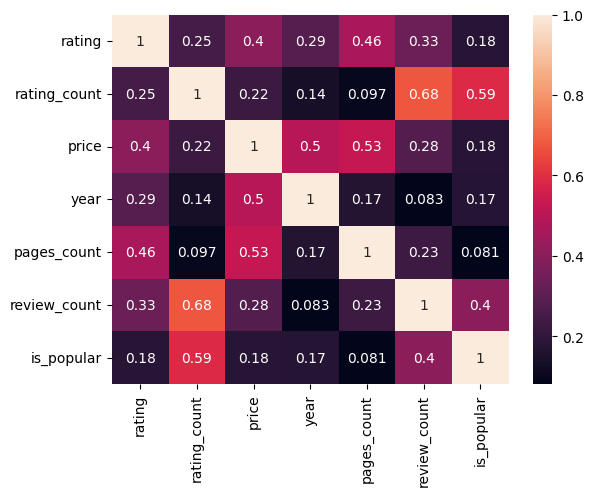

In [548]:
columns_num = df.columns[df.dtypes != 'object']
sns.heatmap(df[columns_num].corr(), annot=True)
plt.show()

- у кол-ва страниц и цены значительная корреляция 0.53
- у года выпуска и цены также значительная корреляци 0.5
- год и кол-во отзывов имею незначительную корреляцию 0.083


#### 11. Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. (1)

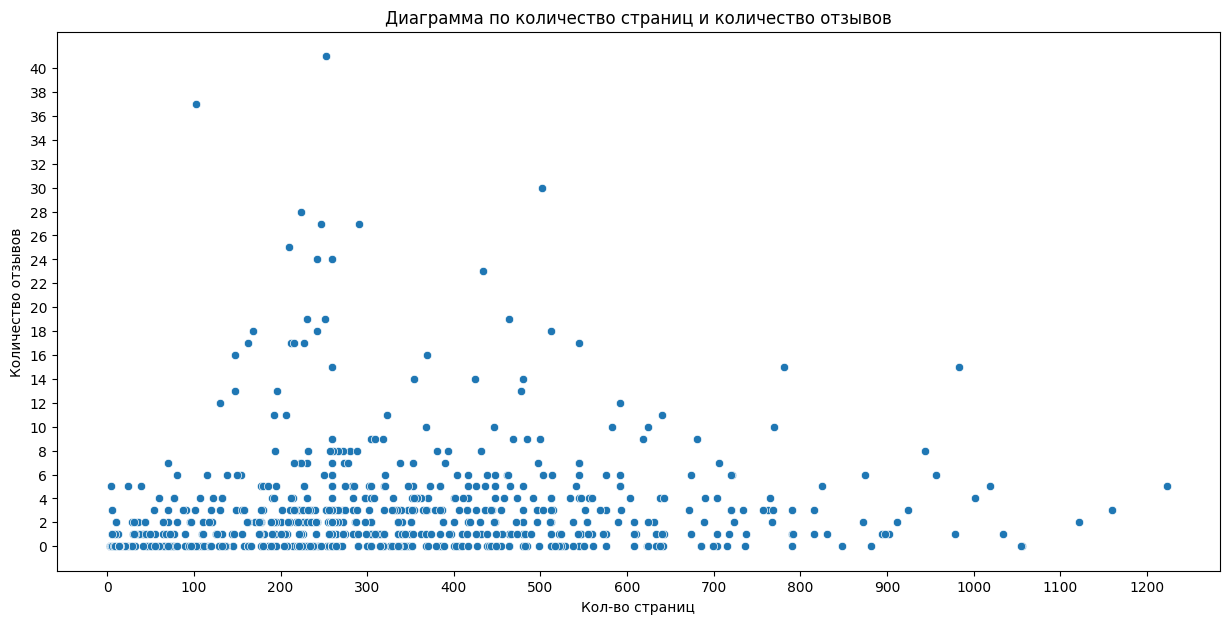

In [550]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, y="review_count", x="pages_count")
plt.yticks(np.arange(0, 41, step=2))

plt.xticks(np.arange(0, 1250, step=100))
plt.xlabel("Кол-во страниц") 
plt.ylabel("Количество отзывов")
plt.title('Диаграмма по количество страниц и количество отзывов')
plt.show()

- видно, что большой разброс кол-во отзывов в книгах до 600 страниц 
- книг , где больше 600 стрниц более вероятно меньше , поэтому не такой большой разброс
- далее  1000 единичные случаи

  Данных нужно больше для более детального анализа.

#### 12. Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)

In [554]:
count_books = df.groupby('year').agg({'name_of_book':'count'}).reset_index()

In [555]:
count_books

,year,name_of_book
0,1985,2
1,1995,2
2,2000,1
3,2002,3
4,2003,4
5,2004,3
6,2005,7
7,2006,21
8,2007,10
9,2008,17


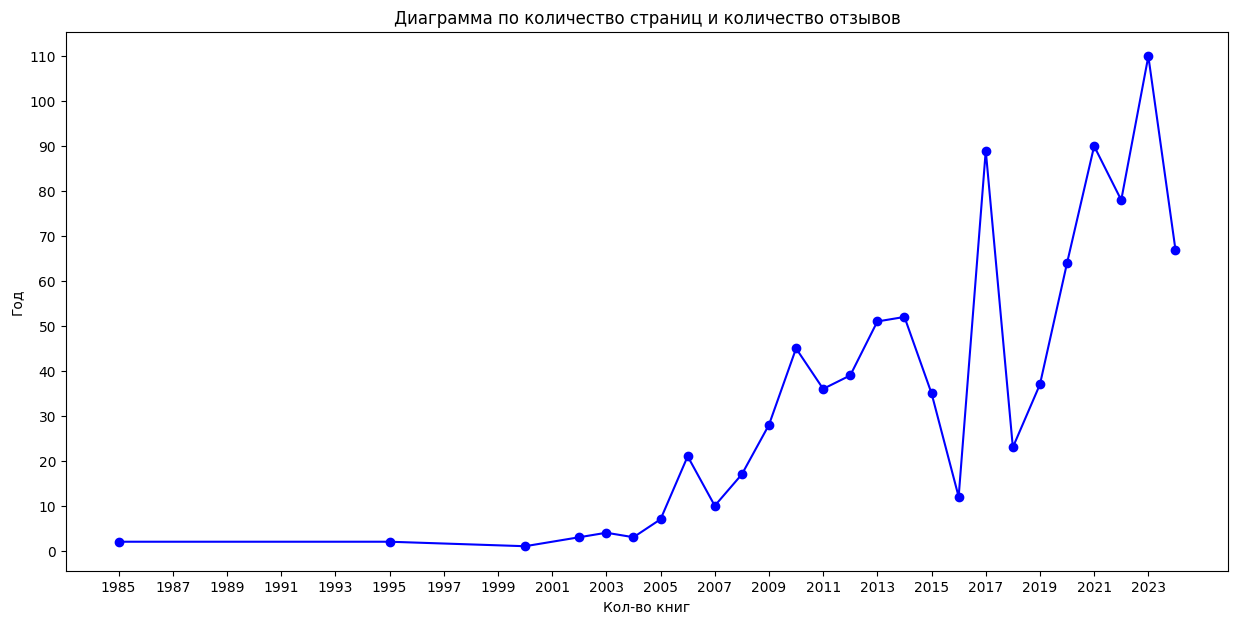

In [566]:
# Построение графика
plt.figure(figsize=(15,7))

plt.plot(count_books['year'], count_books['name_of_book'], marker='o', linestyle='-', color='b')
plt.yticks(np.arange(0, 120, step=10))

plt.xticks(np.arange(1985, 2024, step=2))
plt.xlabel("Кол-во книг") 
plt.ylabel("Год")
plt.title('Диаграмма по количество страниц и количество отзывов')
plt.show()

- видно, что с 2000 по 2013 рост
- с 2014 по 2016  спад
- резкий скачок в 2017 по кол-ву книг
- с 2018 пошел рост
- с 2023 спад

#### 12. Постройте еще любые два графика по вашему усмотрению. (2) Прокомментируйте полученные результаты. (1.5)

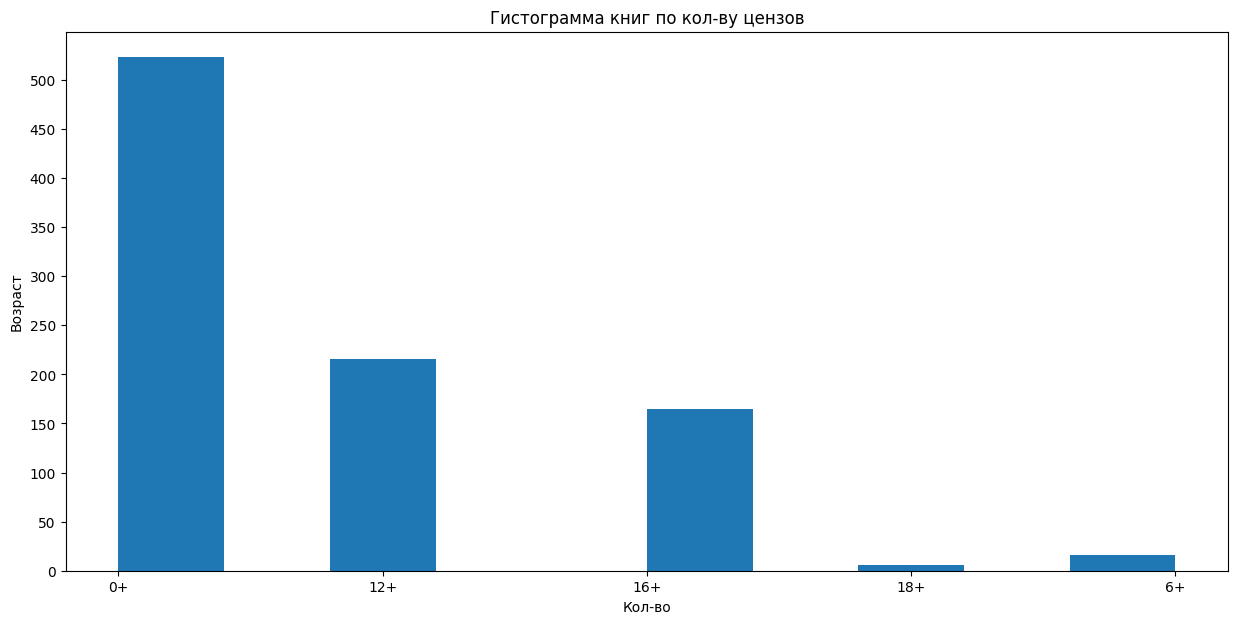

In [576]:
# Построение графика
plt.figure(figsize=(15,7))

plt.hist(df['age'].sort_values())
plt.yticks(np.arange(0, 550, step=50))

# plt.xticks(np.arange(1985, 2024, step=2))
plt.xlabel("Кол-во") 
plt.ylabel("Возраст")
plt.title('Гистограмма книг по кол-ву цензов')
plt.show()

- на первом месте 0+
- меньшее кол-во книг 6+

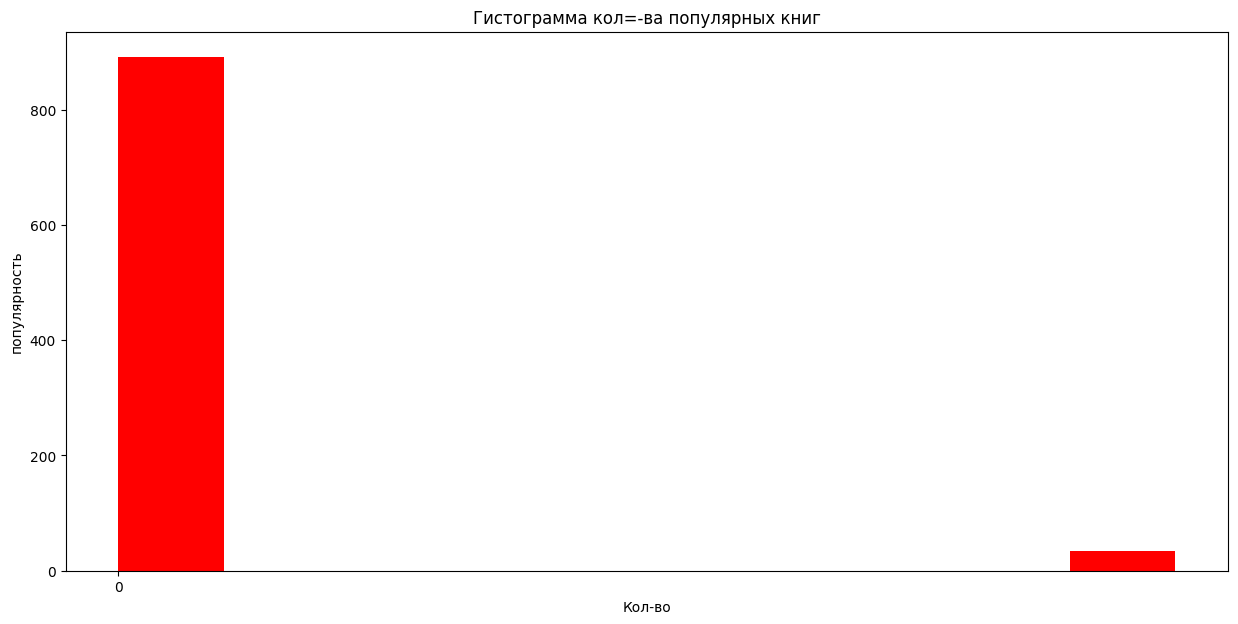

In [586]:
# Построение графика
plt.figure(figsize=(15,7))

plt.hist(df['is_popular'].sort_values(), color='red')
#plt.yticks(np.arange(0, 550, step=50))

plt.xticks(np.arange(0,1, step=1))
plt.xlabel("Кол-во") 
plt.ylabel("популярность")
plt.title('Гистограмма кол=-ва популярных книг')
plt.show()

- как видно кол-во популярных книг значительно меньше

#### 13. Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).


In [590]:
df.head(1)

,name_of_book,name_of_author,link,rating,rating_count,price,age,year,pages_count,review_count,text_reviews,is_popular
0,Изучаем DDD – предметно-ориентированное проект...,Влад Хононов,https://www.litres.ru/book/vlad-hononov/izucha...,0.0,0,549,0+,2022,319,1,"['Эта книга из той лиги, в которой я пока не с...",0


In [593]:
df_author = df.groupby('name_of_author').agg({'name_of_book':'count', 
                                 'rating':'mean',
                                 'review_count':'mean'}).reset_index()

In [596]:
df_author.columns = ['name_of_author', 'count_of_book', 'mean_rating', 'mean_review_count']

In [597]:
df_author

,name_of_author,count_of_book,mean_rating,mean_review_count
0,Arsen Gonian,1,5.0,1.0
1,C. И. Никишов,1,4.7,3.0
2,ChatGPT-4,2,3.9,9.0
3,Eugeny Shtoltc,2,2.5,0.0
4,Jade Carter,1,0.0,0.0
...,...,...,...,...
643,Якоб Нильсен,1,3.8,3.0
644,Ян Гойвертс,1,4.0,1.0
645,Ян Пойнтер,1,3.6,2.0
646,Янта Катупития,1,4.9,3.0


#### 14. Что еще интересного можно увидеть в этом датасете? Просмотрите на данные и ответьте на какие-нибудь вопросы, на которые не ответили в предыдущим пункте. Мы никак не ограничиваем вашу фантазию! (3).

- дубли так и непосомтрели 
- ранее обработку делал с пропусками
- не смотрели rating_counts

In [603]:
df.duplicated().sum()

8

ого! у нас целых 8 явных дублей!

In [605]:
df = df.drop_duplicates()

In [609]:
df = df.reset_index(drop=True)

In [614]:
df['rating_count'].value_counts().head(10)

rating_count
0     280
1      96
2      75
3      53
4      40
6      31
7      30
5      28
9      24
10     19
Name: count, dtype: int64

Как видно rating_count c кол-ом 0 самый популярный, у 280 книг совсем нет рейтинга.